## Importing the modules needed

In [3]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.__version__

'2.2.2'

## Importing the data

### the dataset has data of Data,Time,Transaction and the item sold at the bakery.

In [5]:

df = pd.read_csv('BreadBasket_DMS.csv')

df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [27]:
df.head()

,Date,Time,Transaction,Item,datetime,Week,Month,Weekday,Hours
0,2016-10-30,09:58:11,1,bread,2016-10-30 09:58:11,43,10,6,9
1,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34,43,10,6,10
2,2016-10-30,10:05:34,2,scandinavian,2016-10-30 10:05:34,43,10,6,10
3,2016-10-30,10:07:57,3,hot chocolate,2016-10-30 10:07:57,43,10,6,10
4,2016-10-30,10:07:57,3,jam,2016-10-30 10:07:57,43,10,6,10


In [7]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [10]:
df['Item'].value_counts()

Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: count, Length: 95, dtype: int64

## Transforming all item names to lower case

In [11]:
df['Item'] = df['Item'].str.lower()

## Inspecting the data

In [12]:
x = df['Item'] == "none"
print(x.value_counts())

Item
False    20507
True       786
Name: count, dtype: int64


In [13]:
len(df['Item'].unique())

95

This means that there rows where transaction is made but item is "none" and number of such rows are 786. which will be removed to take in consideration only those rows where transaction is made with an item.

## Droping all none values

In [14]:
df = df.drop(df[df.Item == 'none'].index)

In [17]:
df[df.Item == 'bacon'].index

Index([2643], dtype='int64')

## Checking all unique items that are sold

In [15]:
len(df['Item'].unique())

94

In [16]:
df['Item'].value_counts()

Item
coffee            5471
bread             3325
tea               1435
cake              1025
pastry             856
                  ... 
bacon                1
gift voucher         1
olum & polenta       1
raw bars             1
polenta              1
Name: count, Length: 94, dtype: int64

### There are 94 different unique items sold by bakery or simply only these items are present in the Items column.

## Top 20 best selling items

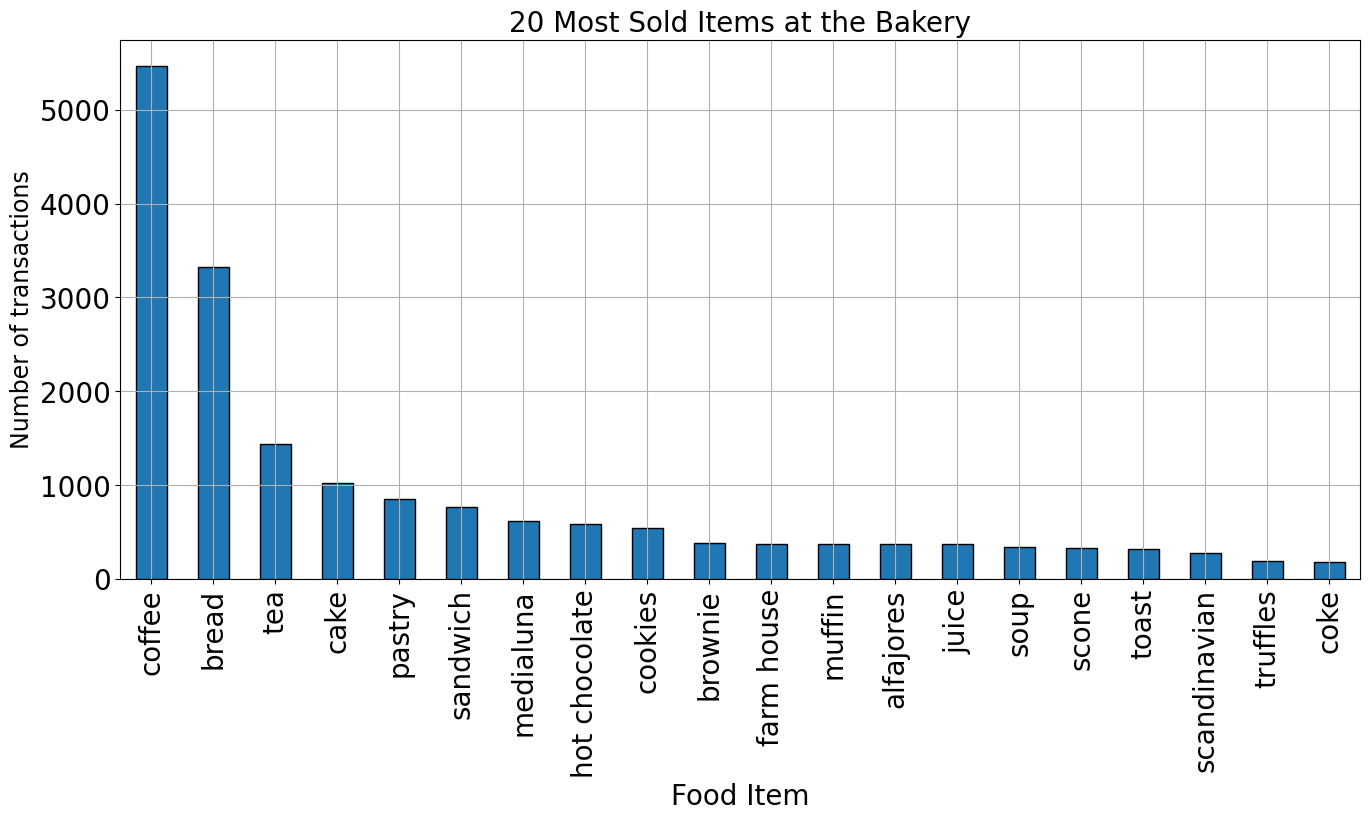

In [18]:
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

Using Datetime we can create a new column called "day_of_week" which can give us insights on which weekday has more transactions

In [24]:
df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.isocalendar().week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour


In [25]:
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours']]

In [26]:
df1

,Date,Transaction,Month,Week,Weekday,Hours
0,2016-10-30,1,10,43,6,9
1,2016-10-30,2,10,43,6,10
2,2016-10-30,2,10,43,6,10
3,2016-10-30,3,10,43,6,10
4,2016-10-30,3,10,43,6,10
...,...,...,...,...,...,...
21288,2017-04-09,9682,4,14,6,14
21289,2017-04-09,9682,4,14,6,14
21290,2017-04-09,9683,4,14,6,14
21291,2017-04-09,9683,4,14,6,14


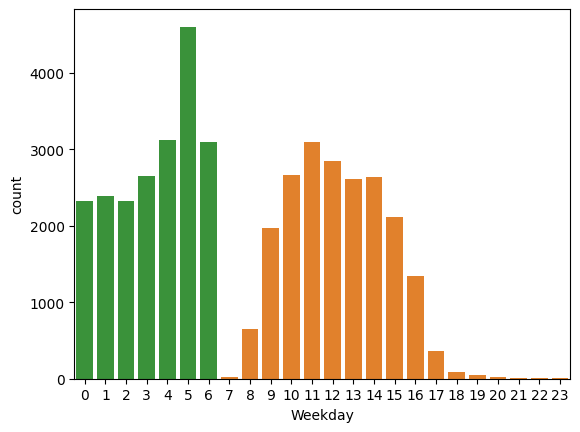

In [30]:
sns.countplot(x='Weekday',data=df1)
plt.show()

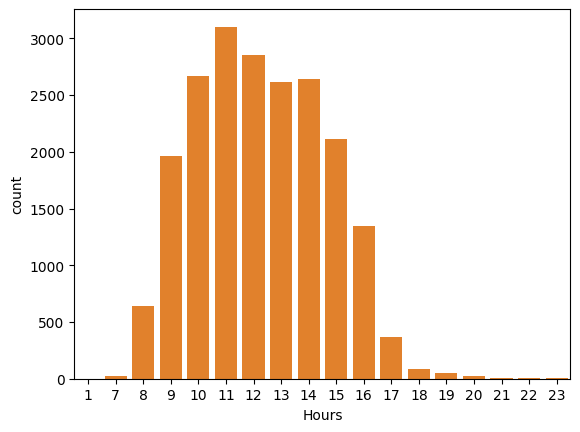

In [32]:
sns.countplot(x='Hours',data=df1)
plt.show()

Now, we need to run apriori algorithm to get insight that if a customer buys one item which item he/she buys next.

In [38]:
from mlxtend.frequent_patterns import apriori #pip install apyori
from mlxtend.frequent_patterns import association_rules

In [41]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [42]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hot_encoded_df.head()

Above lineAbove line of code is transfrom data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.


In [43]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [45]:
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

d:\Data_Science_Notes\dsenv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
frequent_itemsets.shape

(61, 2)

In [47]:
frequent_itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(coffee, cake, bread)"
59,0.011199,"(coffee, bread, pastry)"


Support is an indication of how frequently the itemset appears in the dataset.

Confidence is an indication of how often the rule has been found to be true.

In [48]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
6,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236


In [49]:
rules.shape

(42, 10)

- leverage(A->C) = support(A->C) - support(A)*support(C),
range: [-1, 1]

- conviction = [1 - support(C)] / [1 - confidence(A->C)],
range: [0, inf]

We only want to see the rules where confidence is greater than or equal to 50% so:

In [50]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
15,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851


For instance from the last rule we can see that toast and coffee are commonly bought together. This makes sense since people who purchase toast would like to have coffee with it. 

The support value for the this rule is 0.023666. This number is calculated by dividing the number of transactions containing toast divided by total number of transactions. The confidence level for the rule is 0.704403 which shows that out of all the transactions that contain toast , 70.44% of the transactions also contain coffee. Finally, the lift of 1.47 tells us that coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee.